In [1]:
# installing catboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [3]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;#to handle missing data
from sklearn.compose import ColumnTransformer;#to apply specific transformations to each type of data
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler; #scale features to a specified range, typically between 0 and 1
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.preprocessing import PolynomialFeatures #to generate polynomial features in the dataset
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from fastai.tabular.all import add_datepart;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;
import re #for manipulating strings with regular expressions
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import scipy
from scipy.special import gamma
import pickle

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/ML_project/Train.csv')
test_df= pd.read_csv('/content/drive/MyDrive/ML_project/Test.csv');
sample_df = pd.read_csv('/content/drive/MyDrive/ML_project/SampleSubmission.csv')

# Understanding the data

In [5]:
#Checking the columns in the dataset.
print('The columns in the train dataset are :',train_df.columns)
print('\n')
print('The columns in the test dataset are :',test_df.columns)

The columns in the train dataset are : Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')


The columns in the test dataset are : Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC'],
      dtype='object')


In [6]:
#shape for the datasets
train_df.shape, test_df.shape, sample_df.shape

((107833, 10), (9333, 9), (9333, 2))

Train dataset

In [7]:
# Previewing the top of our dataset
train_df.head()

ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  train_id_0  2016-01-03  TU 0712     CMN    TUN  2016-01-03 10:30:00   
1  train_id_1  2016-01-13  TU 0757     MXP    TUN  2016-01-13 15:05:00   
2  train_id_2  2016-01-16  TU 0214     TUN    IST  2016-01-16 04:10:00   
3  train_id_3  2016-01-17  TU 0480     DJE    NTE  2016-01-17 14:10:00   
4  train_id_4  2016-01-17  TU 0338     TUN    ALG  2016-01-17 14:30:00   

                   STA STATUS         AC  target  
0  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0  
1  2016-01-13 16.55.00    ATA  TU 31BIMO    20.0  
2  2016-01-16 06.45.00    ATA  TU 32AIMN     0.0  
3  2016-01-17 17.00.00    ATA  TU 736IOK     0.0  
4  2016-01-17 15.50.00    ATA  TU 320IMU    22.0

In [8]:
# checking train info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [9]:
# Checking whether each column has an appropriate datatype
train_df.dtypes

ID         object
DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

In [10]:
# we check for null values
train_df.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

The train dataset has no null/missing values

In [11]:
# checking the unique values in each column
for column in train_df.columns:
  print("***************************", column, "********************************")
  print("This column has", train_df[column].nunique(), "unique values, they are shown below:\n")
  print(train_df[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 107833 unique values, they are shown below:

['train_id_0' 'train_id_1' 'train_id_2' ... 'train_id_107830'
 'train_id_107831' 'train_id_107832']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 1011 unique values, they are shown below:

['2016-01-03' '2016-01-13' '2016-01-16' ... '2018-12-28' '2018-12-29'
 '2018-12-30']
________________________________________________________________________________________________

*************************** FLTID ********************************
This column has 1861 unique values, they are shown below:

['TU 0712 ' 'TU 0757 ' 'TU 0214 ' ... 'UG 1020 ' 'UG 1501 ' 'UG 1004 ']
________________________________________________________________________________________________

*************************** DEPSTN ********************************
This

Test dataset

In [12]:
# Previewing the top of our dataset
test_df.head()

ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  test_id_0  2016-05-04  TU 0700     DJE    TUN  2016-05-04 06:40:00   
1  test_id_1  2016-05-05  TU 0395     TUN    BKO  2016-05-05 15:20:00   
2  test_id_2  2016-05-06  TU 0745     FRA    TUN  2016-05-06 10:00:00   
3  test_id_3  2016-05-11  TU 0848     BEY    TUN  2016-05-11 09:40:00   
4  test_id_4  2016-05-11  TU 0635     ORY    MIR  2016-05-11 09:50:00   

                   STA STATUS         AC  
0  2016-05-04 07.30.00    ATA  TU 32AIMF  
1  2016-05-05 20.05.00    ATA  TU 320IMW  
2  2016-05-06 12.25.00    ATA  TU 32AIMC  
3  2016-05-11 13.10.00    ATA  TU 31BIMO  
4  2016-05-11 12.35.00    ATA  TU 736IOQ

In [13]:
# checking the data set info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      9333 non-null   object
 1   DATOP   9333 non-null   object
 2   FLTID   9333 non-null   object
 3   DEPSTN  9333 non-null   object
 4   ARRSTN  9333 non-null   object
 5   STD     9333 non-null   object
 6   STA     9333 non-null   object
 7   STATUS  9333 non-null   object
 8   AC      9333 non-null   object
dtypes: object(9)
memory usage: 656.4+ KB


In [14]:
# check the unique values in each column
for column in test_df.columns:
  print("***************************", column, "********************************")
  print("This column has", test_df[column].nunique(), "unique values, they are shown below:\n")
  print(test_df[column].unique())
  print('________________________________________________________________________________________________\n')

*************************** ID ********************************
This column has 9333 unique values, they are shown below:

['test_id_0' 'test_id_1' 'test_id_2' ... 'test_id_9330' 'test_id_9331'
 'test_id_9332']
________________________________________________________________________________________________

*************************** DATOP ********************************
This column has 86 unique values, they are shown below:

['2016-05-04' '2016-05-05' '2016-05-06' '2016-05-11' '2016-05-23'
 '2016-05-27' '2016-05-28' '2016-05-01' '2016-05-02' '2016-05-03'
 '2016-05-07' '2016-05-13' '2016-05-18' '2016-05-20' '2016-05-21'
 '2016-05-08' '2016-05-09' '2016-05-10' '2016-05-12' '2016-05-14'
 '2016-05-15' '2016-05-16' '2016-05-25' '2016-05-19' '2016-05-26'
 '2016-05-29' '2016-05-17' '2016-05-22' '2016-05-24' '2016-05-30'
 '2017-02-26' '2017-02-27' '2017-02-02' '2017-02-06' '2017-02-10'
 '2017-02-13' '2017-02-14' '2017-02-18' '2017-02-23' '2017-02-07'
 '2017-02-08' '2017-02-17' '2017-02-01'

In [15]:
# Checking whether each column has an appropriate datatype
test_df.dtypes

ID        object
DATOP     object
FLTID     object
DEPSTN    object
ARRSTN    object
STD       object
STA       object
STATUS    object
AC        object
dtype: object

# Cleaning the data

## Train data

In [16]:
# converting the incorrect datatypes to right data types
train_df['DATOP'] = pd.to_datetime(train_df['DATOP'])
train_df['FLTID'] = train_df['FLTID'].astype('object')
train_df['DEPSTN'] = train_df['DEPSTN'].astype('object')
train_df['ARRSTN'] = train_df['ARRSTN'].astype('object')
train_df['STD'] = pd.to_datetime(train_df['STD'])

# replacing period with colons to get the time column to the right format
train_df['STA'] = train_df['STA'].str.replace('.', ':')
train_df['STA'] = pd.to_datetime(train_df['STA'])
train_df['STATUS'] = train_df['STATUS'].astype('object')
train_df['AC'] = train_df['AC'].astype('object')

In [17]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min for granular insights
# splitting DATOP into year, month, day
train_df['year_datop'] = pd.to_datetime(train_df['DATOP']).dt.year
train_df['month_datop'] = pd.to_datetime(train_df['DATOP']).dt.month
train_df['day_datop'] = pd.to_datetime(train_df['DATOP']).dt.day

# splitting STD into hours and minutes
train_df['std_hr'] = pd.to_datetime(train_df['STD']).dt.hour
train_df['std_min'] = pd.to_datetime(train_df['STD']).dt.minute

# splitting STA into hours and minutes
train_df['sta_hr'] = pd.to_datetime(train_df['STA']).dt.hour
train_df['sta_min'] = pd.to_datetime(train_df['STA']).dt.minute

In [18]:
# confirming that the split happened
train_df.head()

ID      DATOP     FLTID DEPSTN ARRSTN                 STD  \
0  train_id_0 2016-01-03  TU 0712     CMN    TUN 2016-01-03 10:30:00   
1  train_id_1 2016-01-13  TU 0757     MXP    TUN 2016-01-13 15:05:00   
2  train_id_2 2016-01-16  TU 0214     TUN    IST 2016-01-16 04:10:00   
3  train_id_3 2016-01-17  TU 0480     DJE    NTE 2016-01-17 14:10:00   
4  train_id_4 2016-01-17  TU 0338     TUN    ALG 2016-01-17 14:30:00   

                  STA STATUS         AC  target  year_datop  month_datop  \
0 2016-01-03 12:55:00    ATA  TU 32AIMN   260.0        2016            1   
1 2016-01-13 16:55:00    ATA  TU 31BIMO    20.0        2016            1   
2 2016-01-16 06:45:00    ATA  TU 32AIMN     0.0        2016            1   
3 2016-01-17 17:00:00    ATA  TU 736IOK     0.0        2016            1   
4 2016-01-17 15:50:00    ATA  TU 320IMU    22.0        2016            1   

   day_datop  std_hr  std_min  sta_hr  sta_min  
0          3      10       30      12       55  
1         13      15        5      16       55  
2         16       4       10       6       45  
3         17      14       10      17        0  
4         17      14       30      15       50

In [19]:
# checking the years in the data set
train_df['year_datop'].unique()

array([2016, 2017, 2018], dtype=int32)

We are covering Flight data between 2016 and 2018

In [20]:
# checking the months in the data set
train_df['month_datop'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

flight were recorded throughout the yeras

In [21]:
# checking the days in the data set
train_df['day_datop'].unique()

array([ 3, 13, 16, 17, 18, 20, 21, 22, 23, 24, 27,  1,  2,  4,  5,  6,  7,
        8, 10, 14, 19, 28, 29, 26, 30, 31, 12, 15, 11, 25,  9],
      dtype=int32)

In [22]:
# checking the hours in the data set
train_df['std_hr'].unique()

array([10, 15,  4, 14, 16,  7, 18, 19, 20, 17,  5,  8, 11,  6,  1, 12,  9,
        0, 22, 23, 13,  3, 21,  2], dtype=int32)

In [23]:
# check the minutes in the data set
train_df['std_min'].unique()

array([30,  5, 10, 20, 15, 35, 40, 45, 55, 50,  0, 25, 46, 19, 13,  1, 39,
       41, 47,  7,  9, 59, 11, 16, 44,  3, 27, 38, 21,  6, 24, 51, 54, 53,
       48, 22, 23, 18, 34, 32,  2, 17, 14, 28, 12,  8, 56, 49, 58, 31, 26,
       43, 37, 57, 42, 36, 29, 52,  4, 33], dtype=int32)

In [24]:
# check the scheduled time of arrival hours in the data set
train_df['sta_hr'].unique()

array([12, 16,  6, 17, 15, 18,  9, 20,  0, 23, 21,  8, 13, 14, 10, 22,  7,
       11,  5, 19,  2,  1,  4,  3], dtype=int32)

In [25]:
# check the scheduled time of arrival minutes in the data set
train_df['sta_min'].unique()

array([55, 45,  0, 50, 15, 30, 40, 10, 20, 25,  5, 35, 31, 34, 47, 43, 59,
        8, 17, 37, 54, 56, 22, 39, 27, 11, 24,  3,  1, 52, 41,  9, 16,  6,
       19, 48, 29, 26, 36, 13, 14, 21,  7, 42, 32,  2, 49, 53, 18, 12, 33,
       51, 23, 28,  4, 38, 44, 46, 58, 57], dtype=int32)

In [26]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

train_df.rename(columns={'ID': 'id', 'DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [27]:
# confirming that the column names have been changed
train_df.head()

id date_flight flight_number departure_point arrival_point  \
0  train_id_0  2016-01-03      TU 0712              CMN           TUN   
1  train_id_1  2016-01-13      TU 0757              MXP           TUN   
2  train_id_2  2016-01-16      TU 0214              TUN           IST   
3  train_id_3  2016-01-17      TU 0480              DJE           NTE   
4  train_id_4  2016-01-17      TU 0338              TUN           ALG   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12:55:00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16:55:00    ATA     TU 31BIMO   
2      2016-01-16 04:10:00    2016-01-16 06:45:00    ATA     TU 32AIMN   
3      2016-01-17 14:10:00    2016-01-17 17:00:00    ATA     TU 736IOK   
4      2016-01-17 14:30:00    2016-01-17 15:50:00    ATA     TU 320IMU   

   delayed_minutes  year_datop  month_datop  day_datop  std_hr  std_min  \
0            260.0        2016            1          3      10       30   
1             20.0        2016            1         13      15        5   
2              0.0        2016            1         16       4       10   
3              0.0        2016            1         17      14       10   
4             22.0        2016            1         17      14       30   

   sta_hr  sta_min  
0      12       55  
1      16       55  
2       6       45  
3      17        0  
4      15       50

## Test dataset

In [28]:
# converting the incorrect datatypes to right data types
test_df['DATOP'] = pd.to_datetime(test_df['DATOP'])
test_df['FLTID'] = test_df['FLTID'].astype('object')
test_df['DEPSTN'] = test_df['DEPSTN'].astype('object')
test_df['ARRSTN'] = test_df['ARRSTN'].astype('object')
test_df['STD'] = pd.to_datetime(test_df['STD'])

# replacing period with column to get the time column in to the right format
test_df['STA'] = test_df['STA'].str.replace('.', ':')
test_df['STA'] = pd.to_datetime(test_df['STA'])
test_df['STATUS'] = test_df['STATUS'].astype('object')
test_df['AC'] = test_df['AC'].astype('object')

In [29]:
# confirming that the columns have been converted to the right types
test_df.dtypes

ID                object
DATOP     datetime64[ns]
FLTID             object
DEPSTN            object
ARRSTN            object
STD       datetime64[ns]
STA       datetime64[ns]
STATUS            object
AC                object
dtype: object

In [30]:
# Checking for anomalies in the date columns
# first we check split the dates into year, month, day , hr, and min
# splitting DATOP into year, month, day
test_df['year_datop'] = pd.to_datetime(test_df['DATOP']).dt.year
test_df['month_datop'] = pd.to_datetime(test_df['DATOP']).dt.month
test_df['day_datop'] = pd.to_datetime(test_df['DATOP']).dt.day

# splitting STD into hours and minutes
test_df['std_hr'] = pd.to_datetime(test_df['STD']).dt.hour
test_df['std_min'] = pd.to_datetime(test_df['STD']).dt.minute

# splitting STA into hours and minutes
test_df['sta_hr'] = pd.to_datetime(test_df['STA']).dt.hour
test_df['sta_min'] = pd.to_datetime(test_df['STA']).dt.minute

In [31]:
# confirming that the split happened
test_df.head()

ID      DATOP     FLTID DEPSTN ARRSTN                 STD  \
0  test_id_0 2016-05-04  TU 0700     DJE    TUN 2016-05-04 06:40:00   
1  test_id_1 2016-05-05  TU 0395     TUN    BKO 2016-05-05 15:20:00   
2  test_id_2 2016-05-06  TU 0745     FRA    TUN 2016-05-06 10:00:00   
3  test_id_3 2016-05-11  TU 0848     BEY    TUN 2016-05-11 09:40:00   
4  test_id_4 2016-05-11  TU 0635     ORY    MIR 2016-05-11 09:50:00   

                  STA STATUS         AC  year_datop  month_datop  day_datop  \
0 2016-05-04 07:30:00    ATA  TU 32AIMF        2016            5          4   
1 2016-05-05 20:05:00    ATA  TU 320IMW        2016            5          5   
2 2016-05-06 12:25:00    ATA  TU 32AIMC        2016            5          6   
3 2016-05-11 13:10:00    ATA  TU 31BIMO        2016            5         11   
4 2016-05-11 12:35:00    ATA  TU 736IOQ        2016            5         11   

   std_hr  std_min  sta_hr  sta_min  
0       6       40       7       30  
1      15       20      20        5  
2      10        0      12       25  
3       9       40      13       10  
4       9       50      12       35

In [32]:
# checking the years in the data set
test_df['year_datop'].unique()

array([2016, 2017, 2018], dtype=int32)

In [33]:
# checking the months in the data set
test_df['month_datop'].unique()

array([5, 2, 9], dtype=int32)

In [34]:
# checking the days in the data set
test_df['day_datop'].unique()

array([ 4,  5,  6, 11, 23, 27, 28,  1,  2,  3,  7, 13, 18, 20, 21,  8,  9,
       10, 12, 14, 15, 16, 25, 19, 26, 29, 17, 22, 24, 30], dtype=int32)

In [35]:
# checking the scheduled departure time hour in the data set
test_df['std_hr'].unique()

array([ 6, 15, 10,  9, 11, 16, 14, 18, 17,  8, 12, 13, 19,  0,  5, 20, 23,
        7,  1,  2, 22,  4,  3, 21], dtype=int32)

In [36]:
# checking the scheduled departure time minute in the data set
test_df['std_min'].unique()

array([40, 20,  0, 50, 10, 35, 30, 15, 45, 25, 55,  5, 33,  2, 27, 24,  7,
       51, 31,  4,  8, 19, 47, 38, 26, 16, 41, 59, 46, 49, 12, 34, 28, 17],
      dtype=int32)

In [37]:
# checking the scheduled arrival time hour in the data set
test_df['sta_hr'].unique()

array([ 7, 20, 12, 13, 17, 15, 21, 19, 10,  9, 16,  5,  6,  8, 14, 23, 22,
        4,  2, 18, 11,  1,  0,  3], dtype=int32)

In [38]:
# checking the scheduled arrival time minute in the data set
test_df['sta_min'].unique()

array([30,  5, 25, 10, 35, 40, 15,  0, 55, 45, 20, 50, 47, 54, 56,  1, 31,
       57, 26, 19, 48, 39, 44, 36, 53, 18,  7,  8,  2, 23,  9,  3, 59, 11,
       22, 27], dtype=int32)

In [39]:
# More data cleaning procedures
# changing the names of columns so that they make more sense

test_df.rename(columns={'ID': 'id','DATOP': 'date_flight', 'FLTID': 'flight_number', 'DEPSTN': 'departure_point', 'ARRSTN': 'arrival_point', 'STD': 'scheduled_time_departure',
             'STA': 'scheduled_time_arrival', 'STATUS': 'status', 'AC': 'aircraft_code', 'target': 'delayed_minutes'}, inplace=True)

In [40]:
# confirming that the column names have been changed
test_df.head()

id date_flight flight_number departure_point arrival_point  \
0  test_id_0  2016-05-04      TU 0700              DJE           TUN   
1  test_id_1  2016-05-05      TU 0395              TUN           BKO   
2  test_id_2  2016-05-06      TU 0745              FRA           TUN   
3  test_id_3  2016-05-11      TU 0848              BEY           TUN   
4  test_id_4  2016-05-11      TU 0635              ORY           MIR   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-05-04 06:40:00    2016-05-04 07:30:00    ATA     TU 32AIMF   
1      2016-05-05 15:20:00    2016-05-05 20:05:00    ATA     TU 320IMW   
2      2016-05-06 10:00:00    2016-05-06 12:25:00    ATA     TU 32AIMC   
3      2016-05-11 09:40:00    2016-05-11 13:10:00    ATA     TU 31BIMO   
4      2016-05-11 09:50:00    2016-05-11 12:35:00    ATA     TU 736IOQ   

   year_datop  month_datop  day_datop  std_hr  std_min  sta_hr  sta_min  
0        2016            5          4       6       40       7       30  
1        2016            5          5      15       20      20        5  
2        2016            5          6      10        0      12       25  
3        2016            5         11       9       40      13       10  
4        2016            5         11       9       50      12       35

# **Feature Engineering**

In [41]:
# using the datepart on the date_flight column to get the date summaries
test_df = add_datepart(test_df,'date_flight')
train_df= add_datepart(train_df,'date_flight')

In [42]:
# preview the train data
train_df.head()

id flight_number departure_point arrival_point  \
0  train_id_0      TU 0712              CMN           TUN   
1  train_id_1      TU 0757              MXP           TUN   
2  train_id_2      TU 0214              TUN           IST   
3  train_id_3      TU 0480              DJE           NTE   
4  train_id_4      TU 0338              TUN           ALG   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12:55:00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16:55:00    ATA     TU 31BIMO   
2      2016-01-16 04:10:00    2016-01-16 06:45:00    ATA     TU 32AIMN   
3      2016-01-17 14:10:00    2016-01-17 17:00:00    ATA     TU 736IOK   
4      2016-01-17 14:30:00    2016-01-17 15:50:00    ATA     TU 320IMU   

   delayed_minutes  year_datop  ...  date_flightDay  date_flightDayofweek  \
0            260.0        2016  ...               3                     6   
1             20.0        2016  ...              13                     2   
2              0.0        2016  ...              16                     5   
3              0.0        2016  ...              17                     6   
4             22.0        2016  ...              17                     6   

   date_flightDayofyear  date_flightIs_month_end  date_flightIs_month_start  \
0                     3                    False                      False   
1                    13                    False                      False   
2                    16                    False                      False   
3                    17                    False                      False   
4                    17                    False                      False   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   

   date_flightIs_year_end  date_flightIs_year_start  date_flightElapsed  
0                   False                     False        1.451779e+09  
1                   False                     False        1.452643e+09  
2                   False                     False        1.452902e+09  
3                   False                     False        1.452989e+09  
4                   False                     False        1.452989e+09  

[5 rows x 29 columns]

In [43]:
# preview the test data
test_df.head()

id flight_number departure_point arrival_point  \
0  test_id_0      TU 0700              DJE           TUN   
1  test_id_1      TU 0395              TUN           BKO   
2  test_id_2      TU 0745              FRA           TUN   
3  test_id_3      TU 0848              BEY           TUN   
4  test_id_4      TU 0635              ORY           MIR   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-05-04 06:40:00    2016-05-04 07:30:00    ATA     TU 32AIMF   
1      2016-05-05 15:20:00    2016-05-05 20:05:00    ATA     TU 320IMW   
2      2016-05-06 10:00:00    2016-05-06 12:25:00    ATA     TU 32AIMC   
3      2016-05-11 09:40:00    2016-05-11 13:10:00    ATA     TU 31BIMO   
4      2016-05-11 09:50:00    2016-05-11 12:35:00    ATA     TU 736IOQ   

   year_datop  month_datop  ...  date_flightDay  date_flightDayofweek  \
0        2016            5  ...               4                     2   
1        2016            5  ...               5                     3   
2        2016            5  ...               6                     4   
3        2016            5  ...              11                     2   
4        2016            5  ...              11                     2   

   date_flightDayofyear  date_flightIs_month_end  date_flightIs_month_start  \
0                   125                    False                      False   
1                   126                    False                      False   
2                   127                    False                      False   
3                   132                    False                      False   
4                   132                    False                      False   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   

   date_flightIs_year_end  date_flightIs_year_start  date_flightElapsed  
0                   False                     False        1.462320e+09  
1                   False                     False        1.462406e+09  
2                   False                     False        1.462493e+09  
3                   False                     False        1.462925e+09  
4                   False                     False        1.462925e+09  

[5 rows x 28 columns]

In [44]:
# Creating a function to be used to create delay or not
def result(delayed_minutes):
  if delayed_minutes > 0:
    return 'delayed'
  elif delayed_minutes == 0:
    return 'on time'
  else:
    return 'early'

# Applying the result function to the dataframe
train_df['result'] = train_df.delayed_minutes.apply(lambda x: result(x))
train_df.drop(columns = 'date_flightElapsed', inplace = True)
# Previewing the changes
train_df.head(2)

id flight_number departure_point arrival_point  \
0  train_id_0      TU 0712              CMN           TUN   
1  train_id_1      TU 0757              MXP           TUN   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12:55:00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16:55:00    ATA     TU 31BIMO   

   delayed_minutes  year_datop  ...  date_flightDay  date_flightDayofweek  \
0            260.0        2016  ...               3                     6   
1             20.0        2016  ...              13                     2   

   date_flightDayofyear  date_flightIs_month_end  date_flightIs_month_start  \
0                     3                    False                      False   
1                    13                    False                      False   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                      False                        False   
1                      False                        False   

   date_flightIs_year_end  date_flightIs_year_start   result  
0                   False                     False  delayed  
1                   False                     False  delayed  

[2 rows x 29 columns]

In [45]:
# Creating a seasons column
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ (dataset['month_datop'] < 3) | (dataset['month_datop'] == 12), 'Season'] = "Winter"
    dataset.loc[(dataset['month_datop'] >= 3) & (dataset['month_datop'] < 6), 'Season'] = "spring"
    dataset.loc[(dataset['month_datop'] >= 6) & (dataset['month_datop'] < 9), 'Season'] = "summer"
    dataset.loc[(dataset['month_datop'] >= 9) & (dataset['month_datop'] < 12), 'Season'] = "fall"

In [46]:
# check the seasons column
print(train_df['Season'].unique())
print(test_df['Season'].unique())

['Winter' 'spring' 'summer' 'fall']
['spring' 'Winter' 'fall']


In [47]:
# find the week of the month
data = [train_df, test_df]
for dataset in data:
    dataset.loc[ dataset['day_datop'] <= 7, 'WeekofMonth'] = "Week 1"
    dataset.loc[(dataset['day_datop'] > 7) & (dataset['day_datop'] <= 14), 'WeekofMonth'] = "Week 2"
    dataset.loc[(dataset['day_datop'] > 14) & (dataset['day_datop'] <= 21), 'WeekofMonth'] = "Week 3"
    dataset.loc[(dataset['day_datop'] > 21) & (dataset['day_datop'] <= 28), 'WeekofMonth'] = "Week 4"
    dataset.loc[(dataset['day_datop'] > 28) & (dataset['day_datop'] <= 31), 'WeekofMonth'] = "Week 5"

In [48]:
# get the unique values
print(train_df['WeekofMonth'].unique())
print(test_df['WeekofMonth'].unique())

['Week 1' 'Week 2' 'Week 3' 'Week 4' 'Week 5']
['Week 1' 'Week 2' 'Week 4' 'Week 3' 'Week 5']


In [49]:
train_df.head()

id flight_number departure_point arrival_point  \
0  train_id_0      TU 0712              CMN           TUN   
1  train_id_1      TU 0757              MXP           TUN   
2  train_id_2      TU 0214              TUN           IST   
3  train_id_3      TU 0480              DJE           NTE   
4  train_id_4      TU 0338              TUN           ALG   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12:55:00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16:55:00    ATA     TU 31BIMO   
2      2016-01-16 04:10:00    2016-01-16 06:45:00    ATA     TU 32AIMN   
3      2016-01-17 14:10:00    2016-01-17 17:00:00    ATA     TU 736IOK   
4      2016-01-17 14:30:00    2016-01-17 15:50:00    ATA     TU 320IMU   

   delayed_minutes  year_datop  ...  date_flightDayofyear  \
0            260.0        2016  ...                     3   
1             20.0        2016  ...                    13   
2              0.0        2016  ...                    16   
3              0.0        2016  ...                    17   
4             22.0        2016  ...                    17   

   date_flightIs_month_end  date_flightIs_month_start  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   

   date_flightIs_year_end  date_flightIs_year_start   result  Season  \
0                   False                     False  delayed  Winter   
1                   False                     False  delayed  Winter   
2                   False                     False  on time  Winter   
3                   False                     False  on time  Winter   
4                   False                     False  delayed  Winter   

   WeekofMonth  
0       Week 1  
1       Week 2  
2       Week 3  
3       Week 3  
4       Week 3  

[5 rows x 31 columns]

In [50]:
# convert to date time and the required format
# scheduled time departure column
train_df['scheduled_time_departure'] = pd.to_datetime(train_df['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')
test_df['scheduled_time_departure'] = pd.to_datetime(test_df['scheduled_time_departure'], format='%Y-%m-%d %H:%M:%S')

# scheduled time arrival column
train_df['scheduled_time_arrival'] = pd.to_datetime(train_df['scheduled_time_arrival'], format='%Y-%m-%d %H:%M:%S')

# Display the first few
test_df['scheduled_time_arrival'] = pd.to_datetime(test_df['scheduled_time_arrival'], format='%Y-%m-%d %H.%M.%S')

In [51]:
train_df.shape, test_df.shape

((107833, 31), (9333, 30))

# EDA

## Univariete Analysis

In [52]:
# determine the measures of dispersion of the price column
print(train_df["delayed_minutes"].var())
print(train_df["delayed_minutes"].std())
print(train_df["delayed_minutes"].skew())
print(train_df["delayed_minutes"].kurt())

13720.739905099768
117.13556208555866
8.433686640943854
129.82428433225377


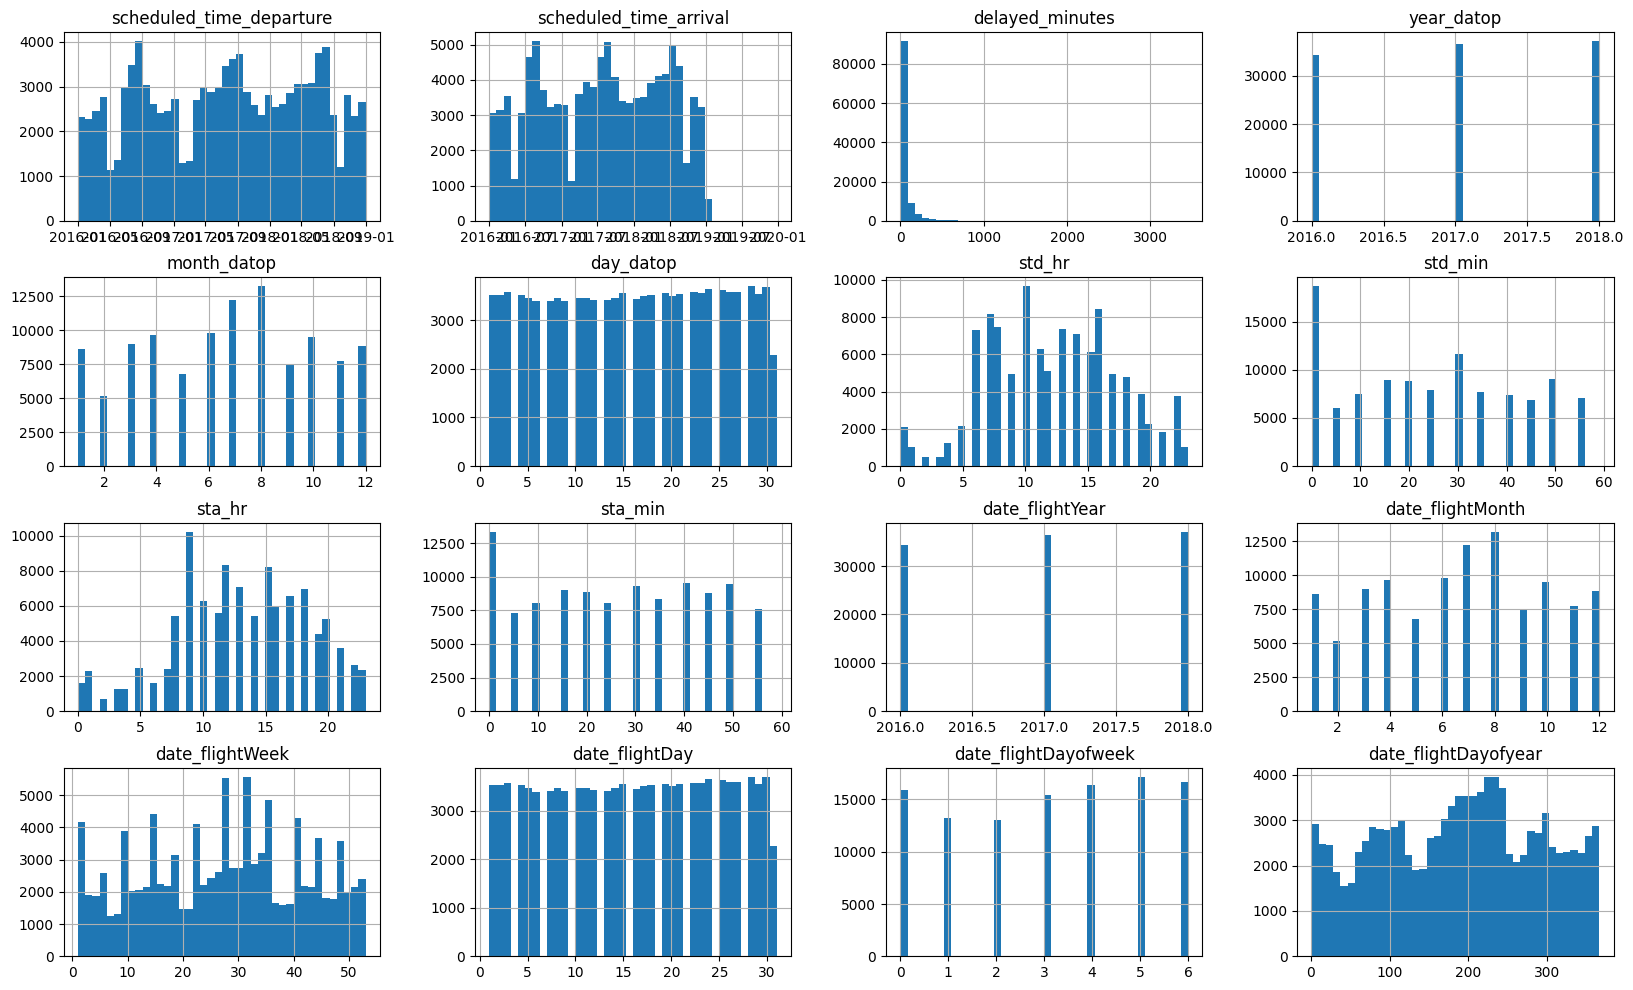

In [53]:
train_df.hist(bins=40, figsize=(20, 12))
plt.show()



*   Delayed time has a moderate variance and is positively skewed



<ipython-input-54-744112a904fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WeekofMonth', data=train_df, palette="GnBu_d", order=train_df['WeekofMonth'].value_counts().index)


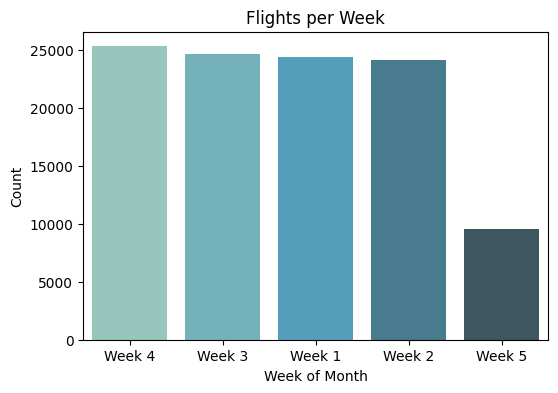

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x='WeekofMonth', data=train_df, palette="GnBu_d", order=train_df['WeekofMonth'].value_counts().index)
plt.title('Flights per Week')
plt.xlabel('Week of Month')
plt.ylabel('Count')
plt.show()



*  Week 4 has a slightly higher number of flights as compared to the other weeks with slightly higher than 25000 flights weekly as compared to the other weeks which have their value counts slightly lower than 25000.



<ipython-input-55-fa90df31a9cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='result', data=train_df, palette="GnBu_d")


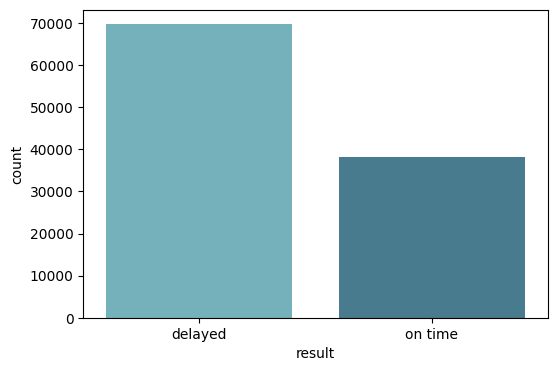

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(x='result', data=train_df, palette="GnBu_d")
plt.show()



*   There are more delayed flights as compared to the flights that were on time for the period given(2016-2018) overally.



<ipython-input-56-08456018bdf4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=train_df, palette="GnBu_d")


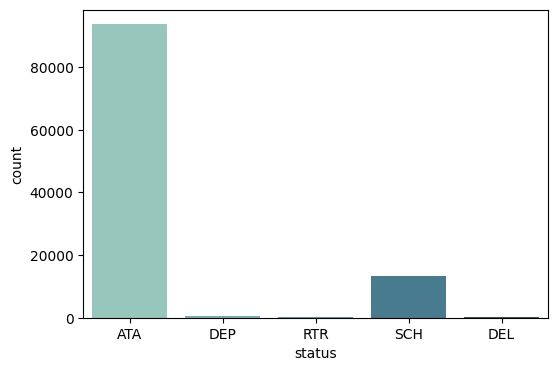

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=train_df, palette="GnBu_d")
plt.show()



*   There was a higher number of fights that arrived at the Actual Time of Arrival(ATA).



<ipython-input-57-016f6f082a35>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=train_df, palette="GnBu_d", order=train_df['Season'].value_counts().index)


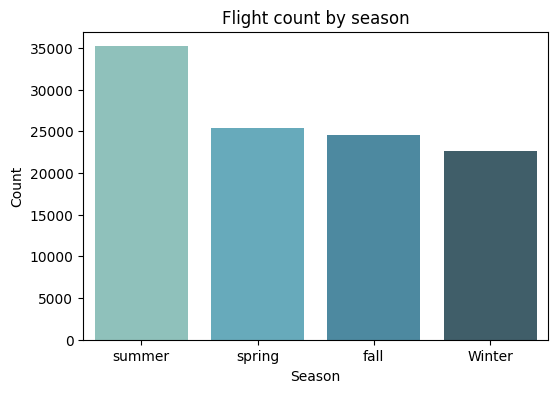

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Season', data=train_df, palette="GnBu_d", order=train_df['Season'].value_counts().index)
plt.title('Flight count by season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



*   The hottest season / summer is in June, July, August and September. Tunis has dry periods in June, July and August. The warmest month is August with an average maximum temperature of 34°C (94°F).

*   This in turn makes it a high/peak season as most people would prefer to travel for holidays(summer)



<ipython-input-58-9fb7e24af414>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_datop', data=train_df, palette="GnBu_d", order=train_df['year_datop'].value_counts().index)


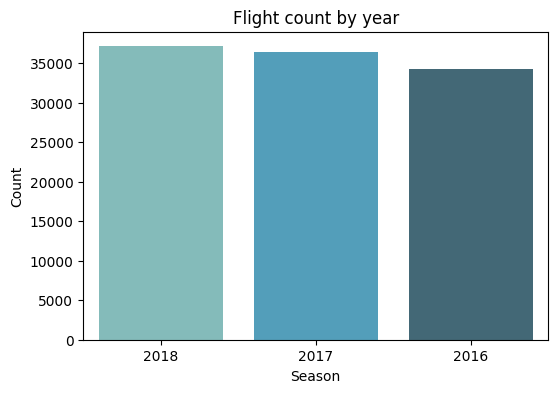

In [58]:
plt.figure(figsize=(6, 4))
sns.countplot(x='year_datop', data=train_df, palette="GnBu_d", order=train_df['year_datop'].value_counts().index)
plt.title('Flight count by year')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [59]:
train_df['year_datop'].value_counts()

year_datop
2018    37113
2017    36448
2016    34272
Name: count, dtype: int64

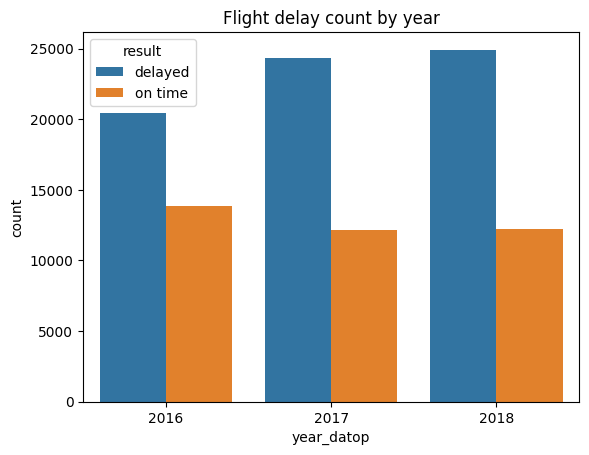

In [60]:
plt.title('Flight delay count by year')
sns.countplot(x='year_datop',data=train_df, hue= train_df['result'])
plt.show()

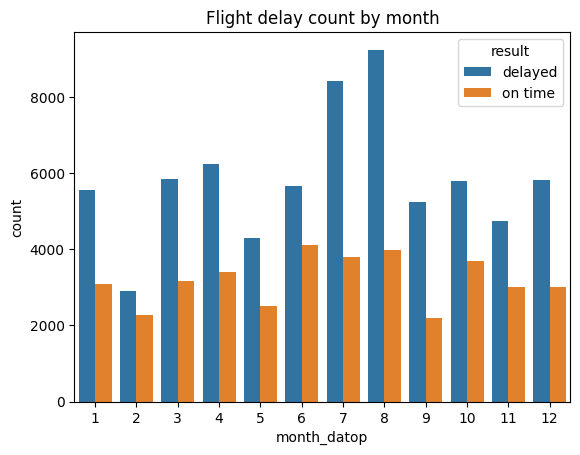

In [61]:
plt.title('Flight delay count by month')
sns.countplot(x='month_datop',data=train_df, hue= train_df.result)
plt.show()

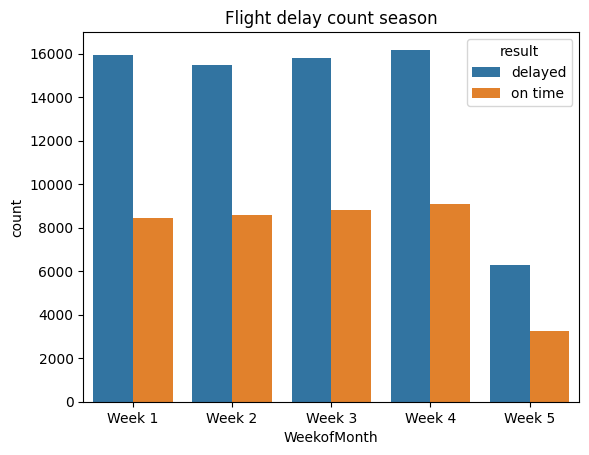

In [62]:
plt.title('Flight delay count season')
sns.countplot(x='WeekofMonth',data=train_df, hue= train_df.result)
plt.show()

## Multivariet Analysis

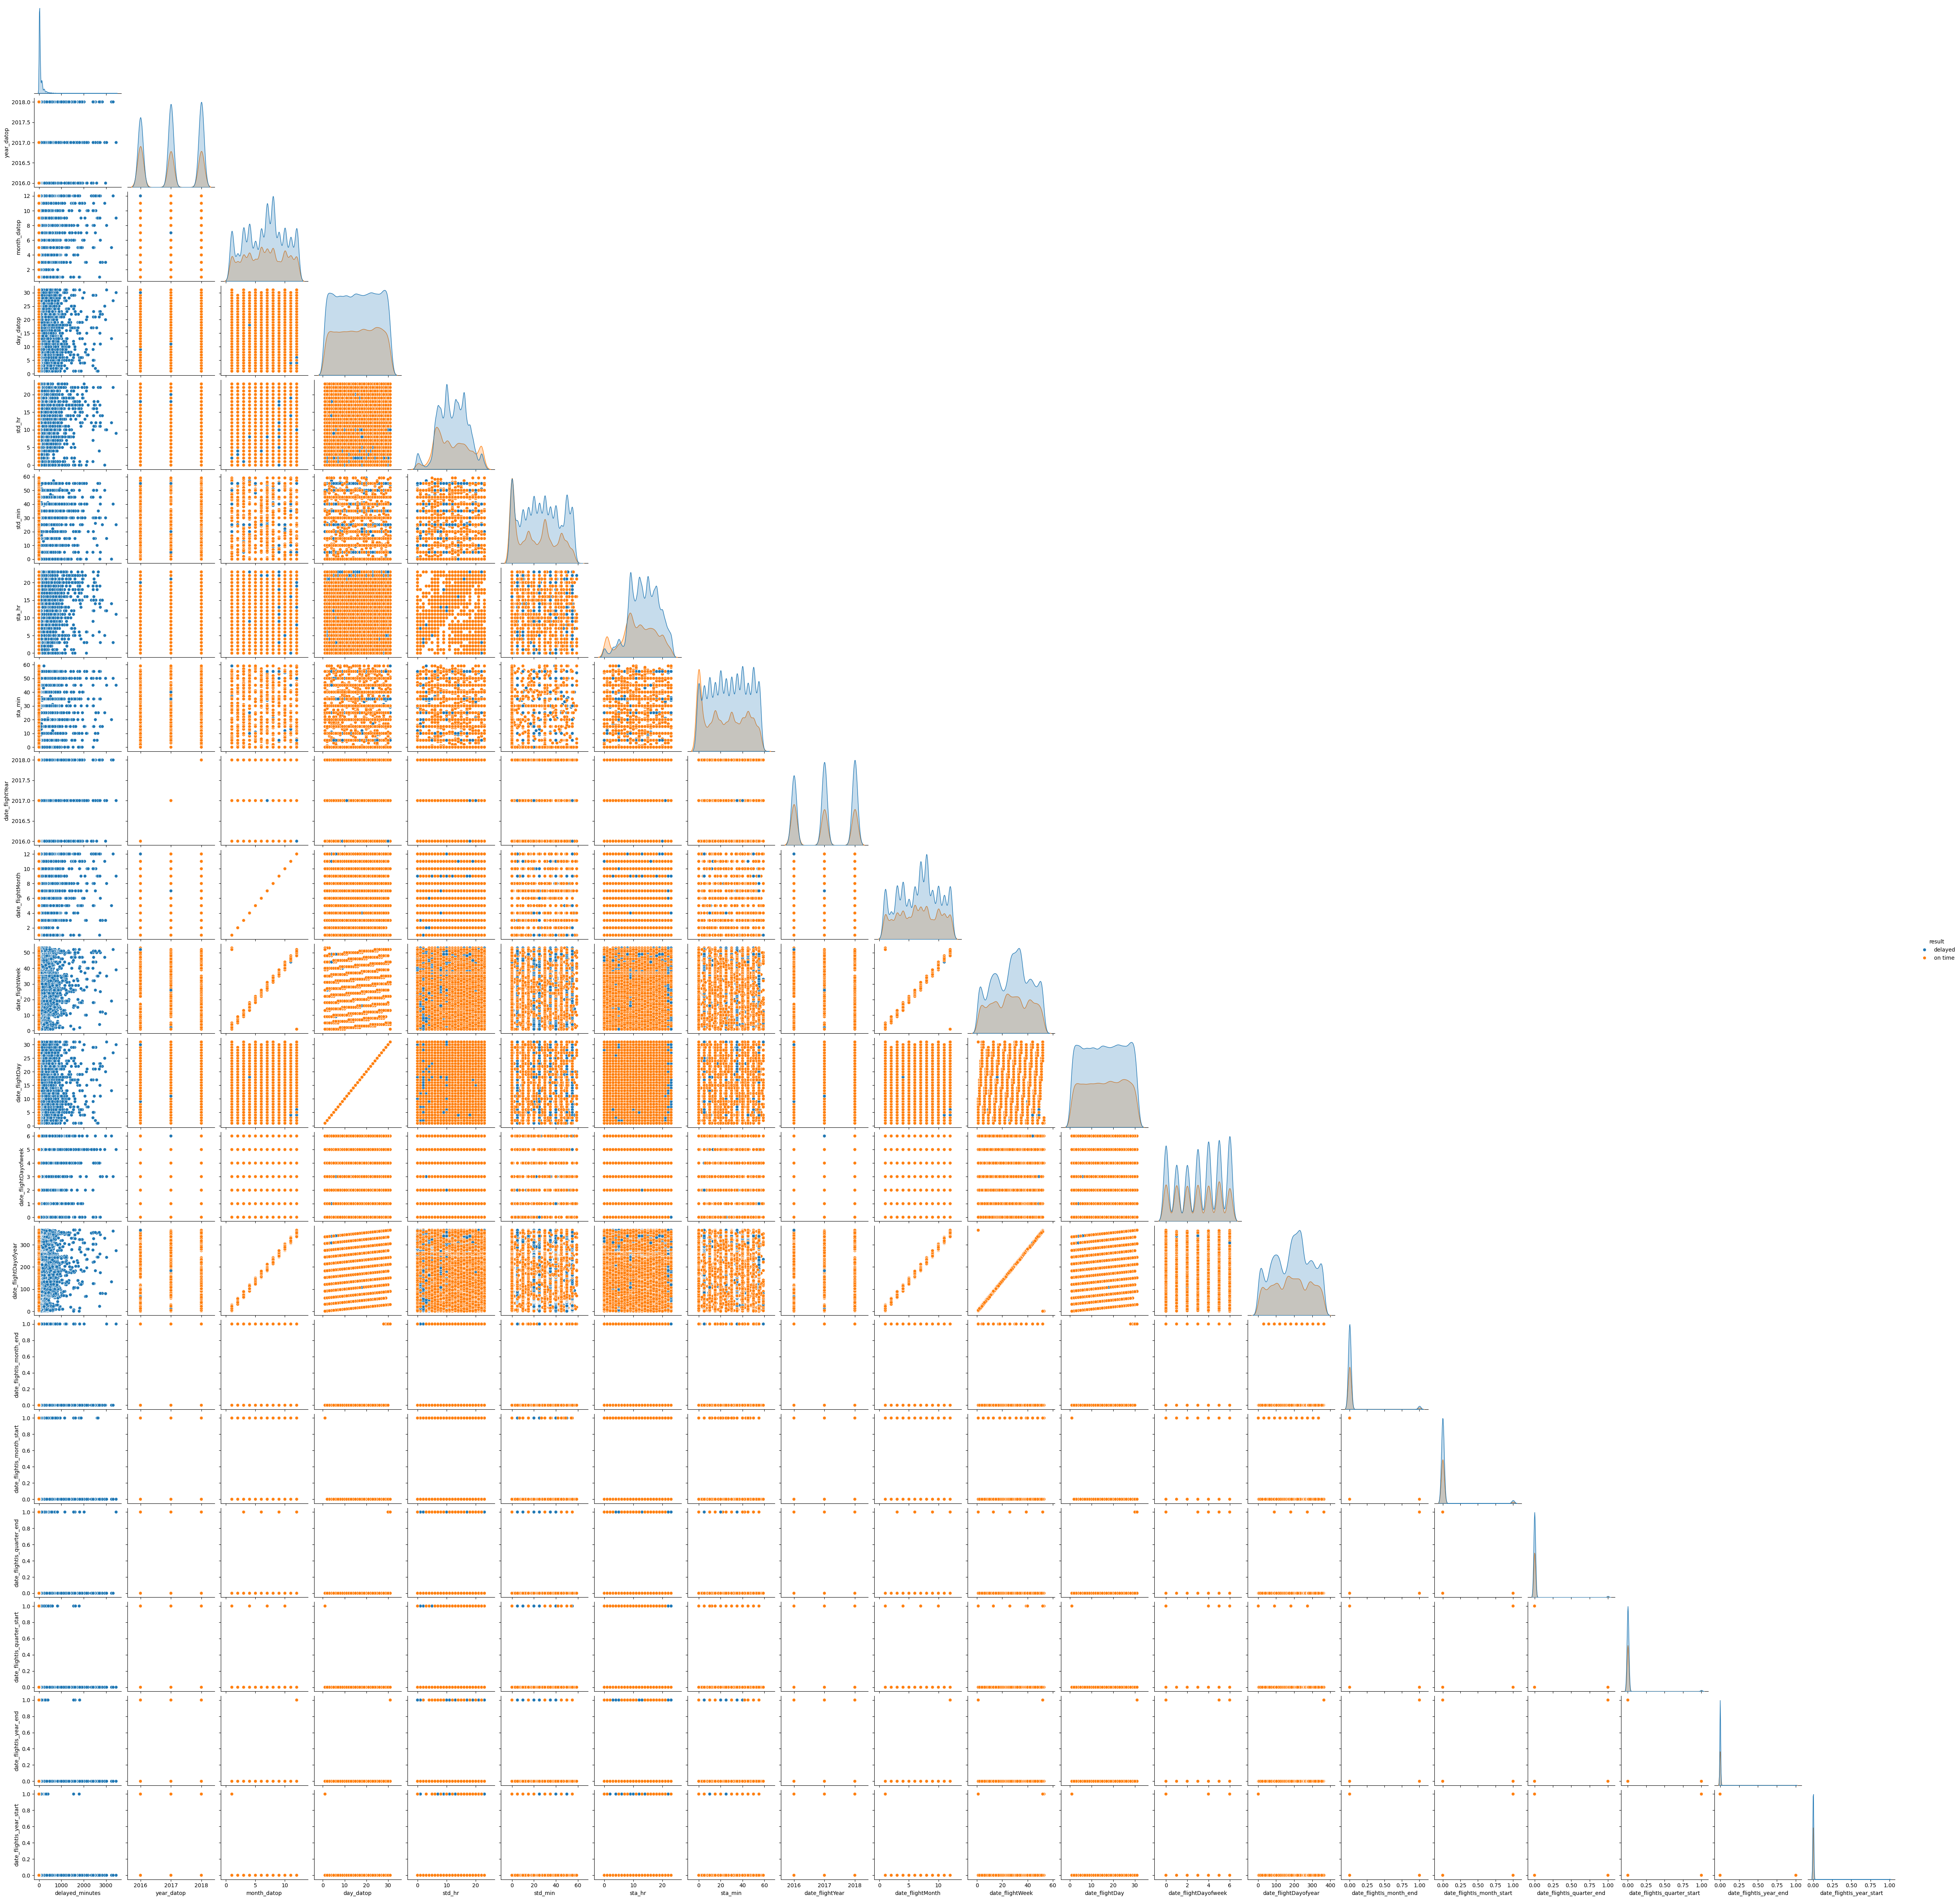

In [63]:
sns.pairplot(train_df, hue="result", corner = True)
plt.show()

# Model Training

## CatBoost Regressor

In [64]:
from catboost import CatBoostRegressor

In [65]:
#dropping the id column
train_df1=train_df.drop(['id'],axis=1)
test_df1=test_df.drop(['id'],axis=1)

In [66]:
train_df1=train_df.drop(['result'],axis=1)

In [67]:
#assigning variables
y=train_df1['delayed_minutes']
X=train_df1.drop(['delayed_minutes'],axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [69]:
def preprocess_data(df):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.datetime64):
            df[col] = df[col].astype(str)
        elif df[col].dtype == bool:
            df[col] = df[col].astype(int)
    return df

In [70]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)
test_df1 = preprocess_data(test_df)

In [71]:
categ_id = np.where(X_train.dtypes == 'object')[0]
print(f'Categorical feature indices: {categ_id}')

Categorical feature indices: [ 0  1  2  3  4  5  6  7 27 28]


In [72]:
model = CatBoostRegressor(
    iterations=700, depth=5, l2_leaf_reg=7, learning_rate=0.03,
    one_hot_max_size=2, task_type='CPU')

In [73]:
model.fit(X_train, y_train, verbose=False, cat_features=categ_id)

In [74]:
# Scoring the model
model_score = model.score(X_test, y_test)
print(f'Model score: {model_score}')

Model score: 0.13001830460600838


In [75]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

Text(0.5, 0, 'Features')

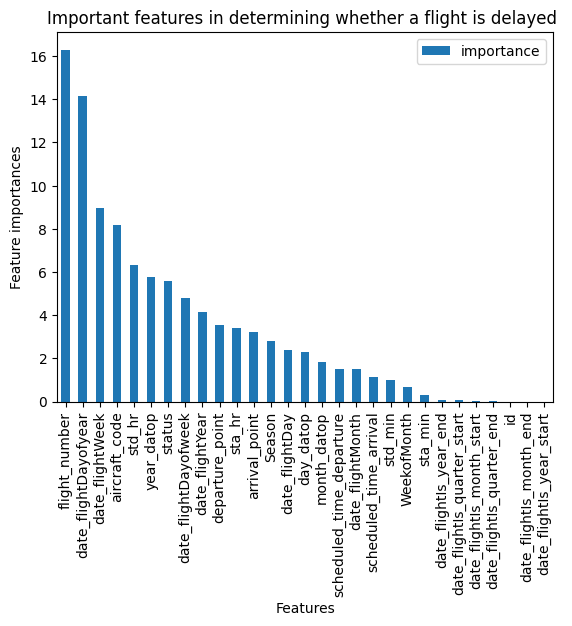

In [76]:
importances.plot.bar()
plt.title("Important features in determining whether a flight is delayed ")
plt.ylabel('Feature importances')
plt.xlabel('Features')

In [77]:
predcat = model.predict(X_test)

In [78]:
#predcat=model.predict(test_df1)

In [80]:
# test2=pd.read_csv('./Test.csv')

In [84]:
mse = np.round(mean_squared_error(y_test, predcat),2)
rmse = np.round(np.sqrt(mse),2)
mse, rmse

(11358.04, 106.57)

In [82]:
# results = {'ID': test2['ID'], 'target':pred}
# results = pd.DataFrame(results)
# results.to_csv('CatBoost_results.csv', index=False)

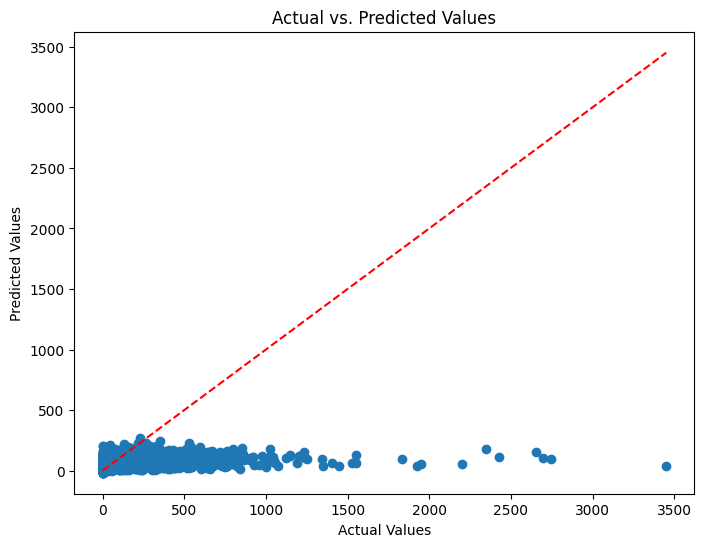

In [83]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predcat)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Hyperparametr Tuning

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# catboost_model = CatBoostRegressor(task_type='CPU', cat_features=categ_id, verbose=0, early_stopping_rounds=10)
# param_dist = {
#     'iterations': [100, 300, 500, 700],
#     'depth': [4, 5, 6, 7, 8],
#     'learning_rate': [0.01, 0.03, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# # Perform RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
# random_search.fit(X_train, y_train)

In [ ]:
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print(f'Best parameters: {best_params}')
# print(f'Best score: {best_score}')

In [ ]:
# # Train the final model with best parameters
# final_model = CatBoostRegressor(**best_params, task_type='CPU', verbose=False)
# final_model.fit(X_train, y_train, cat_features=categ_id)

In [ ]:
# # Making predictions on test_df
# predcat_ = final_model.predict(test_df1)

In [ ]:
# results = {'ID': test2['ID'], 'target':pred}
# results = pd.DataFrame(results)
# results.to_csv('CatBoost_improved_results.csv', index=False)



*   Since the tunned model doesn't vary much from the original model, then we try out other models



## Challenging the solution

### Further feature Engineering

In [85]:
train_df.head()

id flight_number departure_point arrival_point  \
0  train_id_0      TU 0712              CMN           TUN   
1  train_id_1      TU 0757              MXP           TUN   
2  train_id_2      TU 0214              TUN           IST   
3  train_id_3      TU 0480              DJE           NTE   
4  train_id_4      TU 0338              TUN           ALG   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12:55:00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16:55:00    ATA     TU 31BIMO   
2      2016-01-16 04:10:00    2016-01-16 06:45:00    ATA     TU 32AIMN   
3      2016-01-17 14:10:00    2016-01-17 17:00:00    ATA     TU 736IOK   
4      2016-01-17 14:30:00    2016-01-17 15:50:00    ATA     TU 320IMU   

   delayed_minutes  year_datop  ...  date_flightDayofyear  \
0            260.0        2016  ...                     3   
1             20.0        2016  ...                    13   
2              0.0        2016  ...                    16   
3              0.0        2016  ...                    17   
4             22.0        2016  ...                    17   

   date_flightIs_month_end  date_flightIs_month_start  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   

   date_flightIs_year_end  date_flightIs_year_start   result  Season  \
0                   False                     False  delayed  Winter   
1                   False                     False  delayed  Winter   
2                   False                     False  on time  Winter   
3                   False                     False  on time  Winter   
4                   False                     False  delayed  Winter   

   WeekofMonth  
0       Week 1  
1       Week 2  
2       Week 3  
3       Week 3  
4       Week 3  

[5 rows x 31 columns]

In [86]:
test_df.head()

id flight_number departure_point arrival_point  \
0  test_id_0      TU 0700              DJE           TUN   
1  test_id_1      TU 0395              TUN           BKO   
2  test_id_2      TU 0745              FRA           TUN   
3  test_id_3      TU 0848              BEY           TUN   
4  test_id_4      TU 0635              ORY           MIR   

  scheduled_time_departure scheduled_time_arrival status aircraft_code  \
0      2016-05-04 06:40:00    2016-05-04 07:30:00    ATA     TU 32AIMF   
1      2016-05-05 15:20:00    2016-05-05 20:05:00    ATA     TU 320IMW   
2      2016-05-06 10:00:00    2016-05-06 12:25:00    ATA     TU 32AIMC   
3      2016-05-11 09:40:00    2016-05-11 13:10:00    ATA     TU 31BIMO   
4      2016-05-11 09:50:00    2016-05-11 12:35:00    ATA     TU 736IOQ   

   year_datop  month_datop  ...  date_flightDayofyear  \
0        2016            5  ...                   125   
1        2016            5  ...                   126   
2        2016            5  ...                   127   
3        2016            5  ...                   132   
4        2016            5  ...                   132   

   date_flightIs_month_end  date_flightIs_month_start  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   date_flightIs_quarter_end  date_flightIs_quarter_start  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   date_flightIs_year_end  date_flightIs_year_start  date_flightElapsed  \
0                       0                         0        1.462320e+09   
1                       0                         0        1.462406e+09   
2                       0                         0        1.462493e+09   
3                       0                         0        1.462925e+09   
4                       0                         0        1.462925e+09   

   Season  WeekofMonth  
0  spring       Week 1  
1  spring       Week 1  
2  spring       Week 1  
3  spring       Week 2  
4  spring       Week 2  

[5 rows x 30 columns]

In [87]:
train_df['std_month']=train_df['scheduled_time_departure'].dt.month
train_df['sta_month']=train_df['scheduled_time_arrival'].dt.month
train_df['std_day']=train_df['scheduled_time_departure'].dt.day
train_df['sta_day']=train_df['scheduled_time_arrival'].dt.day

In [88]:
test_df['scheduled_time_departure']=pd.to_datetime(test_df['scheduled_time_departure'])
test_df['scheduled_time_arrival']=pd.to_datetime(test_df['scheduled_time_arrival'])

In [89]:
test_df['std_month']=test_df['scheduled_time_departure'].dt.month
test_df['sta_month']=test_df['scheduled_time_arrival'].dt.month
test_df['std_day']=test_df['scheduled_time_departure'].dt.day
test_df['sta_day']=test_df['scheduled_time_arrival'].dt.day

In [90]:
train_df=train_df.drop(['scheduled_time_arrival','scheduled_time_departure'], axis=1)
test_df=test_df.drop(['scheduled_time_arrival','scheduled_time_departure'], axis=1)

In [91]:
train_df.head()

id flight_number departure_point arrival_point status  \
0  train_id_0      TU 0712              CMN           TUN    ATA   
1  train_id_1      TU 0757              MXP           TUN    ATA   
2  train_id_2      TU 0214              TUN           IST    ATA   
3  train_id_3      TU 0480              DJE           NTE    ATA   
4  train_id_4      TU 0338              TUN           ALG    ATA   

  aircraft_code  delayed_minutes  year_datop  month_datop  day_datop  ...  \
0     TU 32AIMN            260.0        2016            1          3  ...   
1     TU 31BIMO             20.0        2016            1         13  ...   
2     TU 32AIMN              0.0        2016            1         16  ...   
3     TU 736IOK              0.0        2016            1         17  ...   
4     TU 320IMU             22.0        2016            1         17  ...   

   date_flightIs_quarter_start  date_flightIs_year_end  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                   False   

   date_flightIs_year_start   result  Season  WeekofMonth  std_month  \
0                     False  delayed  Winter       Week 1          1   
1                     False  delayed  Winter       Week 2          1   
2                     False  on time  Winter       Week 3          1   
3                     False  on time  Winter       Week 3          1   
4                     False  delayed  Winter       Week 3          1   

   sta_month  std_day  sta_day  
0          1        3        3  
1          1       13       13  
2          1       16       16  
3          1       17       17  
4          1       17       17  

[5 rows x 33 columns]

In [92]:

le=LabelEncoder()

In [93]:
train_df['id'] = le.fit_transform(train_df['id']);
train_df['flight_number'] = le.fit_transform(train_df['flight_number']);
train_df['departure_point'] = le.fit_transform(train_df['departure_point'])
train_df['arrival_point'] = le.fit_transform(train_df['arrival_point']);
train_df['status'] = le.fit_transform(train_df['status']);
train_df['aircraft_code'] = le.fit_transform(train_df['aircraft_code'])
train_df['Season'] = le.fit_transform(train_df['Season'])
train_df['WeekofMonth'] = le.fit_transform(train_df['WeekofMonth'])

train_df['date_flightIs_month_end'] = le.fit_transform(train_df['date_flightIs_month_end']);
train_df['date_flightIs_month_start'] = le.fit_transform(train_df['date_flightIs_month_start']);
train_df['date_flightIs_quarter_end'] = le.fit_transform(train_df['date_flightIs_quarter_end'])
train_df['date_flightIs_quarter_start'] = le.fit_transform(train_df['date_flightIs_quarter_start']);
train_df['date_flightIs_year_end'] = le.fit_transform(train_df['date_flightIs_year_end'])

In [94]:
test_df['id'] = le.fit_transform(test_df['id']);
test_df['flight_number'] = le.fit_transform(test_df['flight_number']);
test_df['departure_point'] = le.fit_transform(test_df['departure_point'])
test_df['arrival_point'] = le.fit_transform(test_df['arrival_point']);
test_df['status'] = le.fit_transform(test_df['status']);
test_df['aircraft_code'] = le.fit_transform(test_df['aircraft_code'])
test_df['Season'] = le.fit_transform(test_df['Season'])
test_df['WeekofMonth'] = le.fit_transform(test_df['WeekofMonth'])

test_df['date_flightIs_month_end'] = le.fit_transform(test_df['date_flightIs_month_end']);
test_df['date_flightIs_month_start'] = le.fit_transform(test_df['date_flightIs_month_start']);
test_df['date_flightIs_quarter_end'] = le.fit_transform(test_df['date_flightIs_quarter_end'])
test_df['date_flightIs_quarter_start'] = le.fit_transform(test_df['date_flightIs_quarter_start']);
test_df['date_flightIs_year_end'] = le.fit_transform(test_df['date_flightIs_year_end'])

In [95]:
train_df.head()

id  flight_number  departure_point  arrival_point  status  \
0      0            230               31            119       0   
1      1            257               86            119       0   
2  18945             86              123             58       0   
3  30056            164               37             91       0   
4  41167            136              123              4       0   

   aircraft_code  delayed_minutes  year_datop  month_datop  day_datop  ...  \
0             46            260.0        2016            1          3  ...   
1             28             20.0        2016            1         13  ...   
2             46              0.0        2016            1         16  ...   
3             50              0.0        2016            1         17  ...   
4             34             22.0        2016            1         17  ...   

   date_flightIs_quarter_start  date_flightIs_year_end  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   date_flightIs_year_start   result  Season  WeekofMonth  std_month  \
0                     False  delayed       0            0          1   
1                     False  delayed       0            1          1   
2                     False  on time       0            2          1   
3                     False  on time       0            2          1   
4                     False  delayed       0            2          1   

   sta_month  std_day  sta_day  
0          1        3        3  
1          1       13       13  
2          1       16       16  
3          1       17       17  
4          1       17       17  

[5 rows x 33 columns]

In [96]:
train_df=train_df.drop(['result'], axis=1)

In [97]:
train_df.select_dtypes(include=['bool']).columns

Index(['date_flightIs_year_start'], dtype='object')

In [98]:
train_df['date_flightIs_year_start'] = le.fit_transform(train_df['date_flightIs_year_start'])
test_df['date_flightIs_year_start'] = le.fit_transform(test_df['date_flightIs_year_start'])

In [99]:
y=train_df['delayed_minutes']
X=train_df.drop(['delayed_minutes'], axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### XGBoost Regresor

In [103]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
# Make predictions
pred = xgb_model.predict(X_test)

In [105]:
mse=np.round(mean_squared_error(y_test, pred),2)
rmse=np.sqrt(mse)
mse, rmse

(11155.6, 105.62007384962388)

In [106]:
# results = {'ID': test2['ID'], 'target':pred}
# results = pd.DataFrame(results)
# results.to_csv('XGBoost_results.csv', index=False)

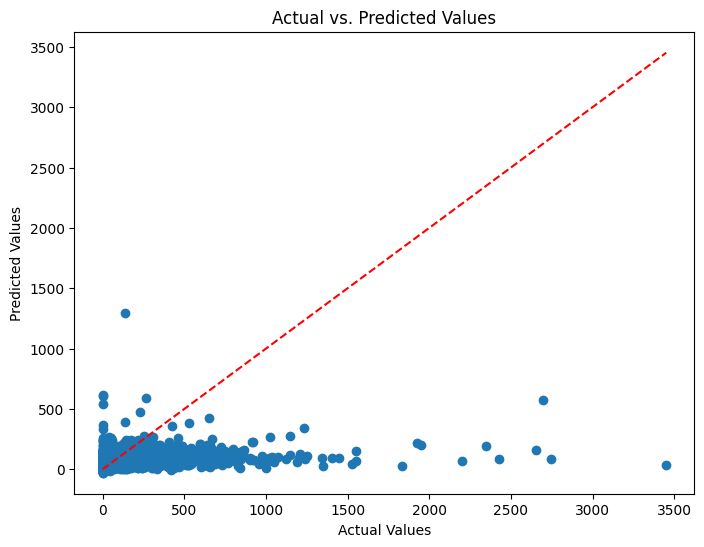

In [107]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### Ridge

In [110]:
rid = Ridge();
rid.fit(X_train, y_train);
ridge_score=rid.score(X_test, y_test)
ridge_score

0.049367553316548185

In [111]:
predrid  = rid.predict(X_test)

In [112]:
# results = {'ID': test2['ID'], 'target':predrid}
# results = pd.DataFrame(results)
# results.to_csv('ridge_results.csv', index=False)

In [113]:
mse=np.round(mean_squared_error(y_test, predrid),2)
rmse=np.sqrt(mse)
mse, rmse

(12410.98, 111.40457800288101)

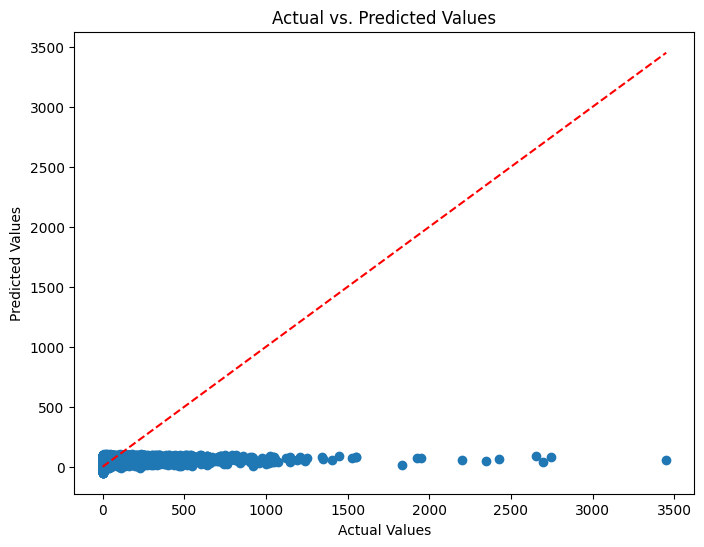

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predrid)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### Random Forest

In [115]:
random_f = RandomForestRegressor();
random_f.fit(X_train, y_train);
random_f_score=random_f.score(X_test, y_test)

In [120]:
predrandom_f  = random_f.predict(X_test)

In [117]:
# results = {'ID': test2['ID'], 'target':predrandom_f}
# results = pd.DataFrame(results)
# results.to_csv('randomF_results.csv', index=False)

In [121]:
mse=np.round(mean_squared_error(y_test, predrandom_f),2)
rmse=np.sqrt(mse)
mse, rmse

(10851.58, 104.17091724660968)

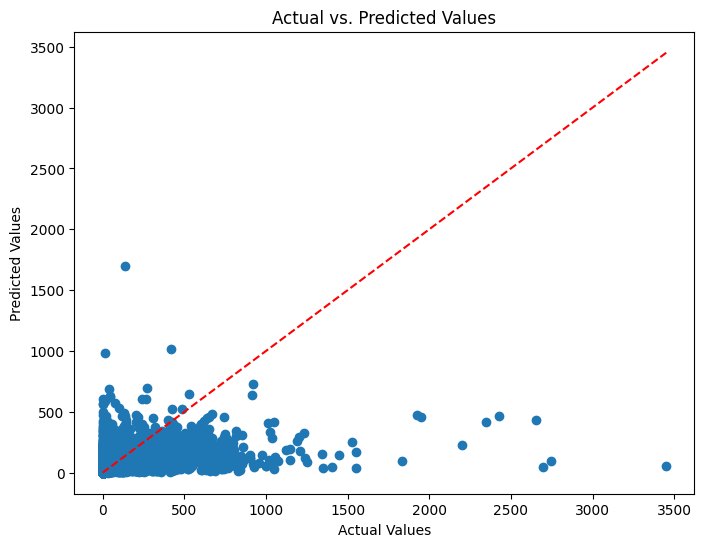

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predrandom_f)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### Decision Tree Regressor

In [123]:
dc = DecisionTreeRegressor();
dc.fit(X_train, y_train);
dc_score=dc.score(X_test, y_test)
dc_score

-0.72229507667259

In [124]:
preddc=dc.predict(X_test)

In [125]:
# results = {'ID': test2['ID'], 'target':preddc}
# results = pd.DataFrame(results)
# results.to_csv('DecisonT.csv', index=False)

In [126]:
mse=np.round(mean_squared_error(y_test, preddc),2)
rmse=np.sqrt(mse)
mse, rmse

(22485.42, 149.95139212424803)

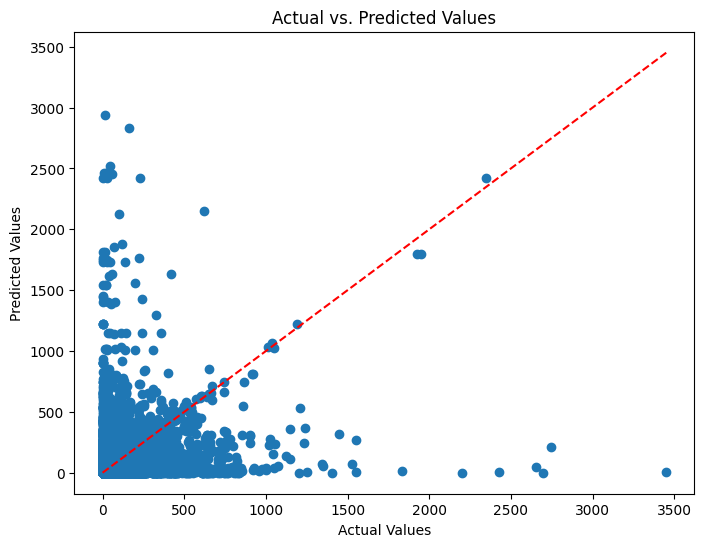

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preddc)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### KNNeighbor Regressor

In [128]:
knn = KNeighborsRegressor();
knn.fit(X_train, y_train);
knn_score=knn.score(X_test, y_test)
knn_score

-0.017869659123743054

In [129]:
predknn=knn.predict(X_test)

In [130]:
# results = {'ID': test2['ID'], 'target':predknn}
# results = pd.DataFrame(results)
# results.to_csv('knn.csv', index=False)

In [131]:
mse=np.round(mean_squared_error(y_test, predknn),2)
rmse=np.sqrt(mse)
mse, rmse

(13288.79, 115.27701418756473)

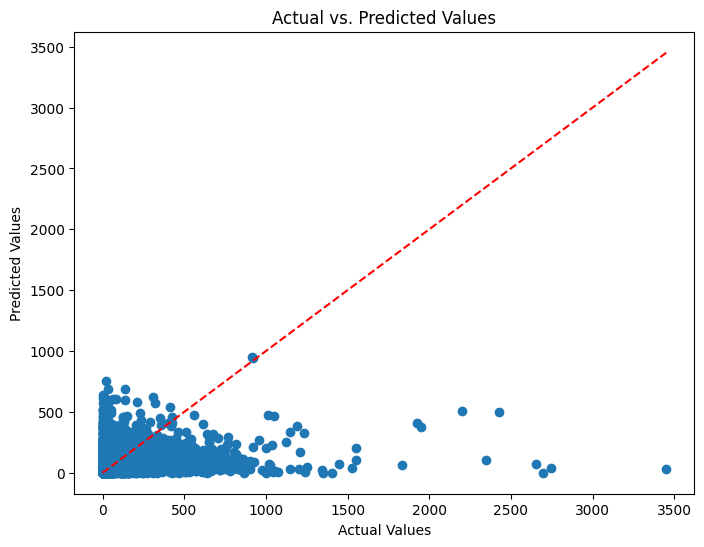

In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predknn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

### NN

In [133]:
# Define the neural network architecture
seq = Sequential()
seq.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
seq.add(Dropout(0.2))
seq.add(Dense(32, activation='relu'))
seq.add(Dropout(0.2))
seq.add(Dense(1))  # Regression output

In [134]:
# Compile the model
seq.compile(optimizer='adam', loss='mean_squared_error')


In [135]:
# Train the model
seq.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
2157/2157 [==============================] - 12s 3ms/step - loss: 1438075.5000 - val_loss: 14226.0576
Epoch 2/100
2157/2157 [==============================] - 9s 4ms/step - loss: 16201.7490 - val_loss: 13967.7178
Epoch 3/100
2157/2157 [==============================] - 7s 3ms/step - loss: 14646.3330 - val_loss: 13874.4648
Epoch 4/100
2157/2157 [==============================] - 9s 4ms/step - loss: 14512.4023 - val_loss: 14423.0723
Epoch 5/100
2157/2157 [==============================] - 8s 3ms/step - loss: 14290.9541 - val_loss: 13943.0889
Epoch 6/100
2157/2157 [==============================] - 8s 4ms/step - loss: 14138.8623 - val_loss: 14549.5361
Epoch 7/100
2157/2157 [==============================] - 9s 4ms/step - loss: 14053.4619 - val_loss: 14133.2842
Epoch 8/100
2157/2157 [==============================] - 7s 3ms/step - loss: 14049.6924 - val_loss: 13851.6602
Epoch 9/100
2157/2157 [==============================] - 8s 4ms/step - loss: 14011.9473 - val_loss: 13868.521

In [136]:
# Make predictions
predseq = model.predict(X_test)

# Evaluate the model
mse = np.round(mean_squared_error(y_test, predseq))
rmse = np.round(np.sqrt(mse))

CatBoostError: /src/catboost/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 8 should be feature with name year_datop (found day_datop).

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## COWRF

In [137]:
# Define the Cuckoo Search parameters
n_nests = 25
n_iterations = 100
pa = 0.25  # Discovery rate of alien eggs/solutions
beta = 1.5  # Parameter for Levy flight


In [138]:
# Define the objective function
def objective_function(params):
    n_estimators, max_depth = int(params[0]), int(params[1])
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [139]:
# Initialize nests
nests = np.zeros((n_nests, 2))
nests[:, 0] = np.random.randint(50, 300, size=n_nests)  # n_estimators
nests[:, 1] = np.random.randint(5, 20, size=n_nests)  # max_depth

best_nest = nests[0, :]
best_score = objective_function(best_nest)

In [140]:
 #Levy flight function
def levy_flight(Lambda):
    sigma = (gamma(1 + Lambda) * np.sin(np.pi * Lambda / 2) /
             (gamma((1 + Lambda) / 2) * Lambda * 2**((Lambda - 1) / 2)))**(1 / Lambda)
    u = np.random.randn() * sigma
    v = np.random.randn()
    step = u / abs(v)**(1 / Lambda)
    return step


In [ ]:

# Cuckoo Search optimization loop
for iteration in range(n_iterations):
    for i in range(n_nests):
        new_nest = nests[i, :] + levy_flight(beta)
        new_nest[0] = int(np.clip(new_nest[0], 50, 300))  # Clipping the range for n_estimators
        new_nest[1] = int(np.clip(new_nest[1], 5, 20))  # Clipping the range for max_depth

        new_score = objective_function(new_nest)
        if new_score < best_score:
            best_nest = new_nest
            best_score = new_score
        nests[i, :] = new_nest if new_score < objective_function(nests[i, :]) else nests[i, :]



In [ ]:
# Discover new solutions
    for i in range(n_nests):
        if np.random.rand() < pa:
            nests[i, :] = np.random.randint(50, 300), np.random.randint(5, 20)

    print(f'Iteration {iteration + 1}/{n_iterations}, Best Score: {best_score}')

In [ ]:
# Train the best model found
best_model = RandomForestRegressor(n_estimators=int(best_nest[0]), max_depth=int(best_nest[1]), random_state=42)
best_model.fit(X_train, y_train)
predCOWRF = best_model.predict(test_df)
# final_rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f'Final RMSE: {final_rmse}')

results = {'ID': test2['ID'], 'target':predCOWRF}
results = pd.DataFrame(results)
results.to_csv('COWRF_results.csv', index=False)

"""# Deploying Model"""

# Deployment

In [ ]:
# Saving model to disk
pickle.dump(model, open('CatB.pkl','wb'))
